In [26]:
import numpy as np
import pandas as pd

In [10]:
#1. Regression Datasets preprocessing
mu, sigma = 1, 0.05
np.random.seed(2)
x = np.random.normal(mu, sigma, 100)
vel=np.random.rand(100,1)

In [16]:
y=((1.3 *(np.square(x))) + (4.8 * x) + 8) + vel.T
data1=pd.DataFrame({'x':x, 'y':y.reshape(100,)},columns=['x','y']) 
data1

,x,y
0,0.979162,14.554806
1,0.997187,14.905441
2,0.893190,13.948001
3,1.082014,14.892356
4,0.910328,14.038140
5,0.957913,14.280122
6,1.025144,14.834796
7,0.937736,14.343804
8,0.947102,13.958006
9,0.954550,13.952980


In [17]:
#Winedata preprocessing
winered_data = pd.read_csv('winequality-red.csv', delimiter = ';')

In [20]:
#Normalise wine dataset
for feature in winered_data.columns:
    if feature != "quality":
        winered_data[feature] = normalize(winered_data[feature])
winered_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [19]:
#Split the dataset
def split_DataSet(Dataset, size):
        msk = np.random.rand(len(Dataset))<size
        Data_train = Dataset[msk]
        Data_test = Dataset[~msk]
        return Data_train,Data_test
#Normalize the columns
def normalize(x):
    return (x-min(x))/(max(x)-min(x))

In [21]:
#Split D1 dataset
trainSet, testSet = split_DataSet(data1, 0.8)
x_Train=trainSet['x'].as_matrix()
x_Test=trainSet['x'].as_matrix()
y_Train=trainSet['y'].as_matrix()
y_Test=trainSet['y'].as_matrix()

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [22]:
#Split wine dataset
trainSet1, testSet1 = split_DataSet(winered_data, 0.8)
x_Train1 = trainSet1.as_matrix(columns = ['volatile acidity', 'chlorides', 'density', 'alcohol'])
x_Test1 = testSet1.as_matrix(columns = ['volatile acidity', 'chlorides', 'density', 'alcohol'])
y_Train1 = trainSet1['quality']
y_Test1 = testSet1['quality']

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [23]:
#Generalized Linear Models with Scikit Learn
from sklearn.linear_model import SGDRegressor

In [24]:
clf = SGDRegressor(learning_rate = 'constant', penalty=None ,eta0=0.001)
clf.fit(x_Train1, y_Train1)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [25]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [32]:
#Ordinary Least Squares without Regulariztion
alphas = np.arange(0.3, 0.9, 0.05)
trainRMSENoReg = []
testRMSENoReg = []

for alpha in alphas:
    clf = SGDRegressor(n_iter = 1000,learning_rate = 'constant' , penalty='None' ,eta0=alpha)
    clf.fit(x_Train1, y_Train1)
    trainRMSENoReg.append(np.sqrt(mean_squared_error(y_Train1, clf.predict(x_Train1))))
    testRMSENoReg.append(np.sqrt(mean_squared_error(y_Test1, clf.predict(x_Test1))))

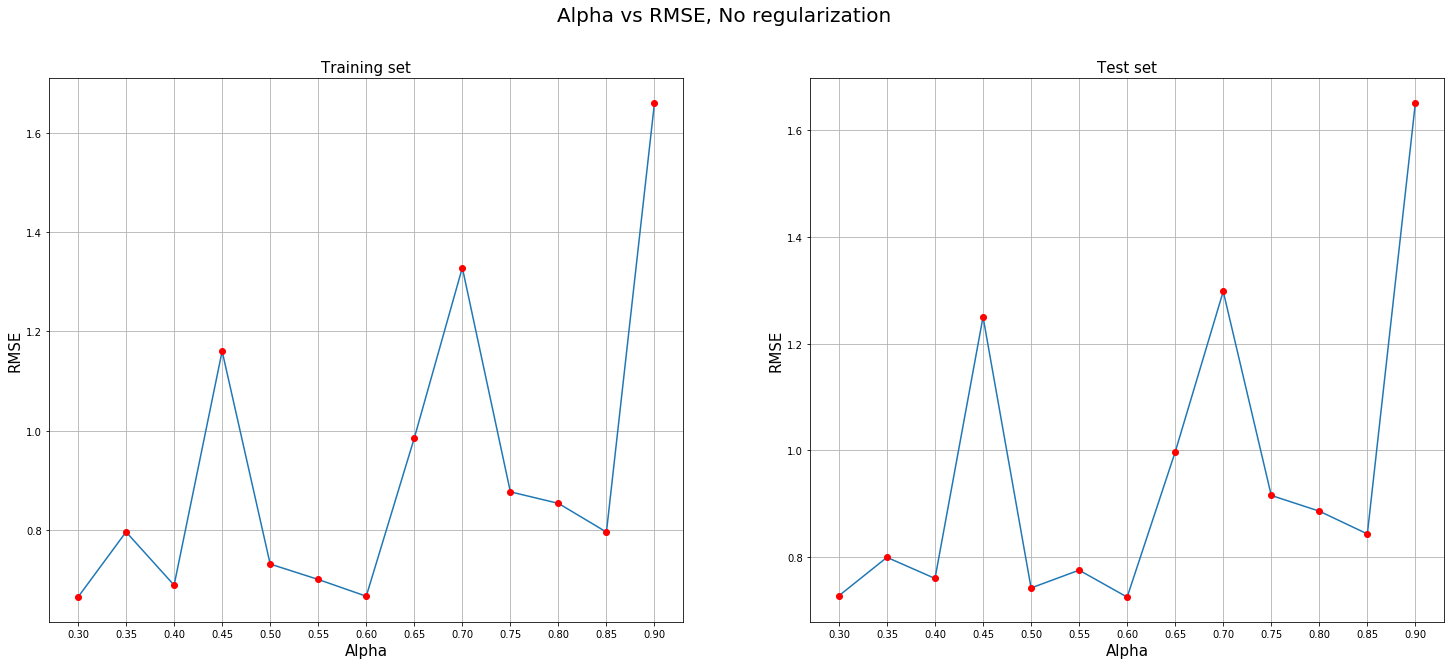

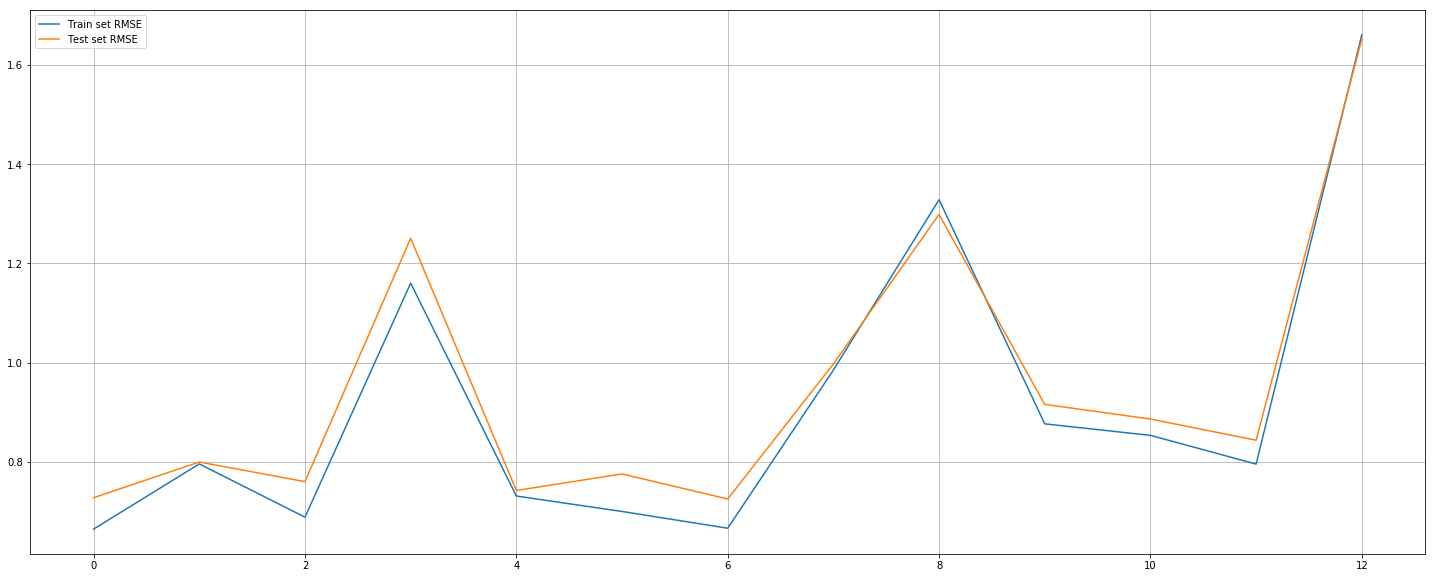

In [33]:
#Plot for Ordinary Least Squares without Regulariztion
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

fig.suptitle("Alpha vs RMSE, No regularization", fontsize = 20)
axs[0].plot(alphas, trainRMSENoReg)
axs[0].plot(alphas, trainRMSENoReg, "ro")
axs[0].grid()
axs[0].set_xticks(alphas)
axs[0].set_xlabel('Alpha', fontsize = 15)
axs[0].set_ylabel('RMSE', fontsize = 15)
axs[0].set_title("Training set", fontsize = 15)

axs[1].plot(alphas, testRMSENoReg)
axs[1].plot(alphas, testRMSENoReg, "ro")
axs[1].grid()
axs[1].set_xticks(alphas)
axs[1].set_xlabel('Alpha', fontsize = 15)
axs[1].set_ylabel('RMSE', fontsize = 15)
axs[1].set_title("Test set", fontsize = 15)
                  
plt.show()
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.plot(trainRMSENoReg, label = "Train set RMSE")
axs.plot(testRMSENoReg, label = "Test set RMSE")
axs.grid()
axs.legend()
plt.show()

In [34]:
#Ridge Regression
alphas = np.arange(0.3, 0.9, 0.05)
trainRMSEReg_ridge = []
testRMSEReg_ridge = []

for alp in alphas:
    clf = SGDRegressor(alpha=0.01, n_iter = 1000,learning_rate = 'constant' , penalty='l2' ,eta0=alp)
    clf.fit(x_Train1, y_Train1)
    trainRMSEReg_ridge.append(np.sqrt(mean_squared_error(y_Train1, clf.predict(x_Train1))))
    testRMSEReg_ridge.append(np.sqrt(mean_squared_error(y_Test1, clf.predict(x_Test1))))

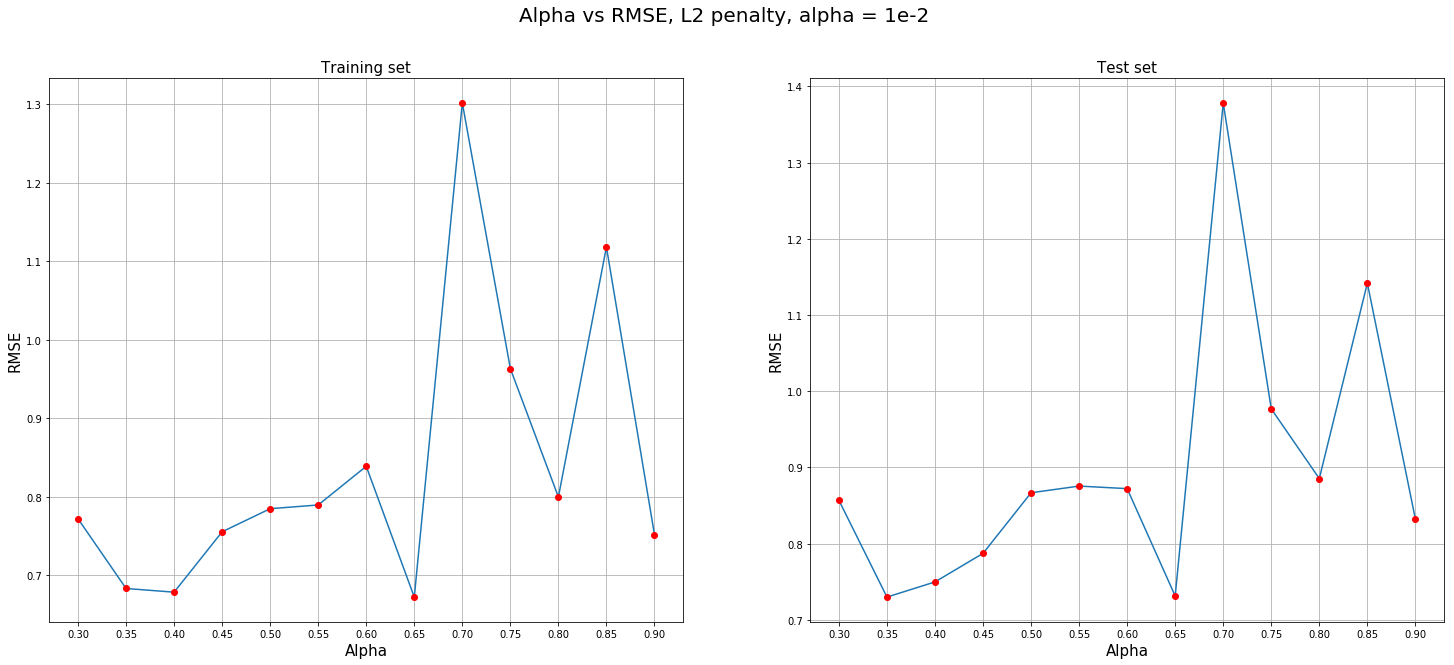

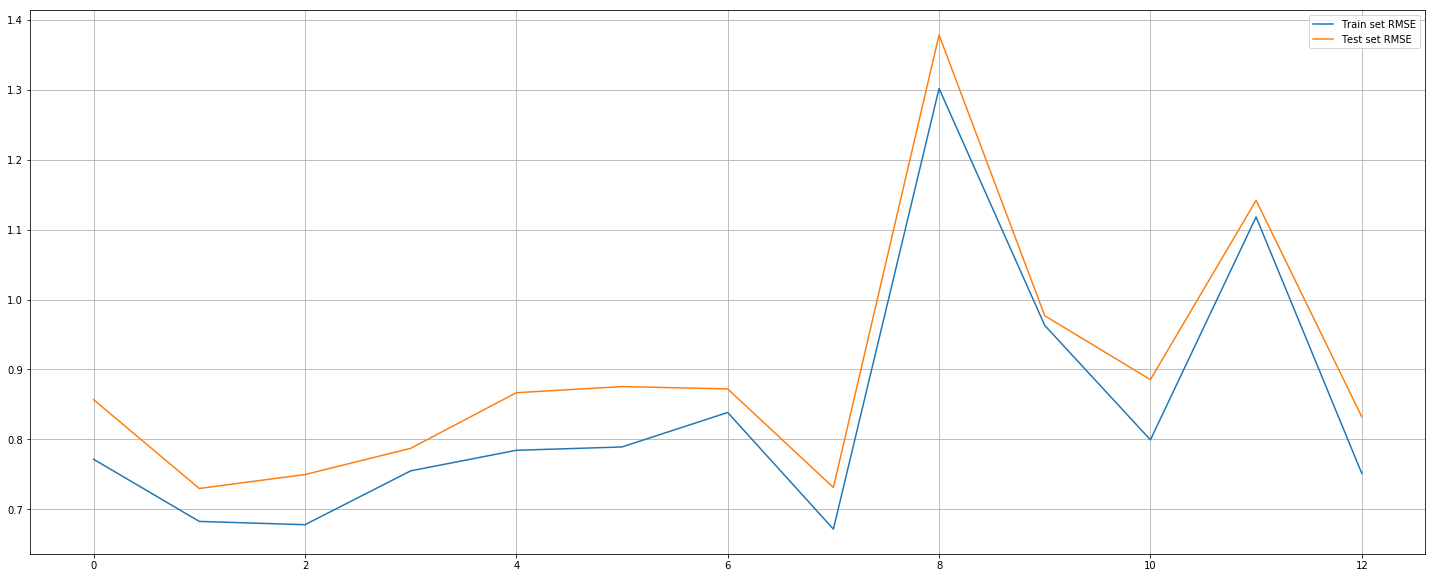

In [35]:
#Plot for Ridge Regression
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

fig.suptitle("Alpha vs RMSE, L2 penalty, alpha = 1e-2", fontsize = 20)
axs[0].plot(alphas, trainRMSEReg_ridge)
axs[0].plot(alphas, trainRMSEReg_ridge, "ro")
axs[0].grid()
axs[0].set_xticks(alphas)
axs[0].set_xlabel('Alpha', fontsize = 15)
axs[0].set_ylabel('RMSE', fontsize = 15)
axs[0].set_title("Training set", fontsize = 15)

axs[1].plot(alphas, testRMSEReg_ridge)
axs[1].plot(alphas, testRMSEReg_ridge, "ro")
axs[1].grid()
axs[1].set_xticks(alphas)
axs[1].set_xlabel('Alpha', fontsize = 15)
axs[1].set_ylabel('RMSE', fontsize = 15)
axs[1].set_title("Test set", fontsize = 15)
                  
plt.show()
plt.close()

fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.plot(trainRMSEReg_ridge, label = "Train set RMSE")
axs.plot(testRMSEReg_ridge, label = "Test set RMSE")
axs.legend()
axs.grid()
plt.show()

In [42]:
#LASSO Regression
alphas = np.arange(0.3, 0.9, 0.05)
trainRMSEReg_lasso = []
testRMSEReg_lasso = []
for alp in alphas:
    clf = SGDRegressor(alpha=0.001, n_iter = 1000,learning_rate = 'constant' , penalty='l1' ,eta0=alp)
    clf.fit(x_Train1, y_Train1)
    trainRMSEReg_lasso.append(np.sqrt(mean_squared_error(y_Train1, clf.predict(x_Train1))))
    testRMSEReg_lasso.append(np.sqrt(mean_squared_error(y_Test1, clf.predict(x_Test1))))

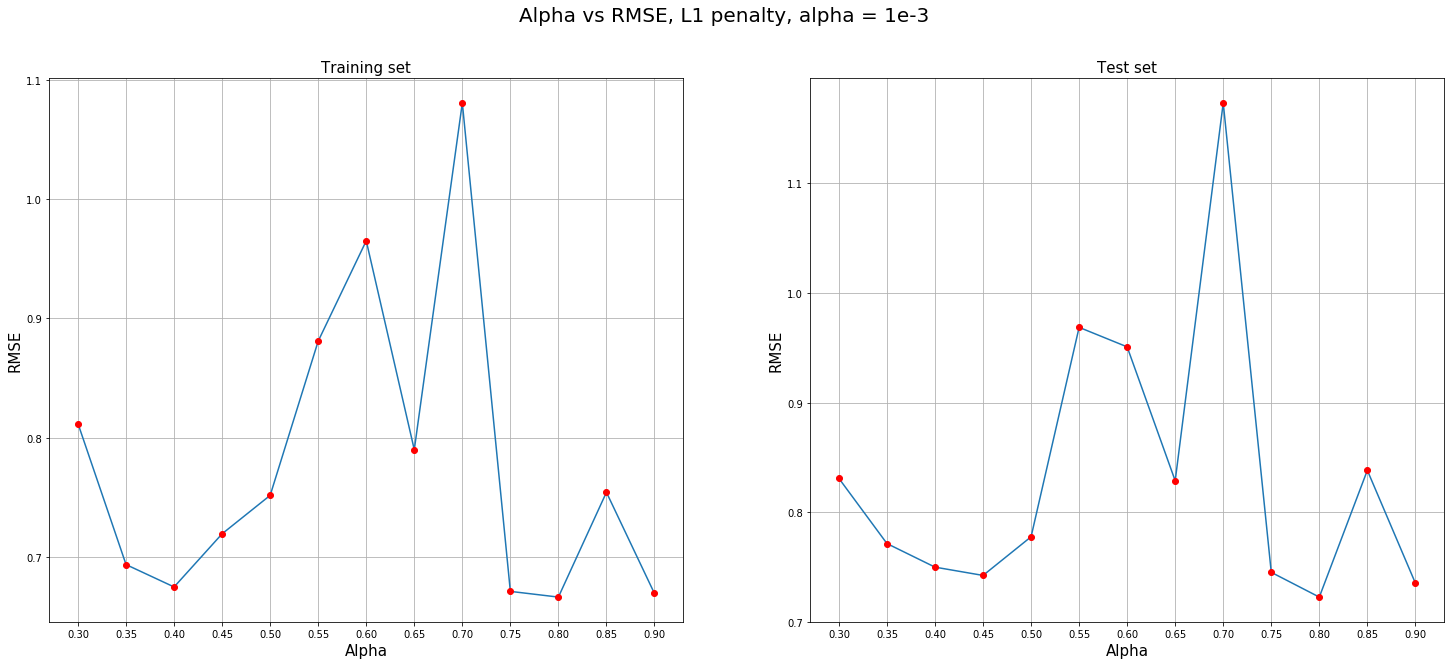

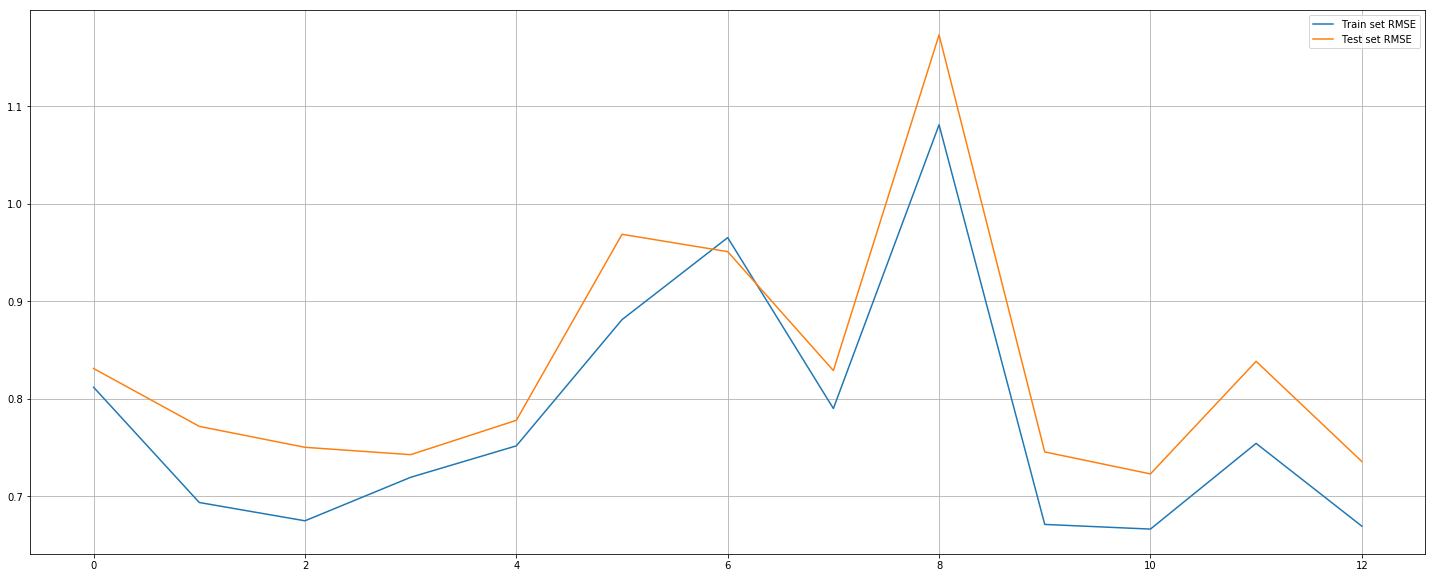

In [43]:
#Plot for LASSO Regression
fig, axs = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle("Alpha vs RMSE, L1 penalty, alpha = 1e-3", fontsize = 20)
axs[0].plot(alphas, trainRMSEReg_lasso)
axs[0].plot(alphas, trainRMSEReg_lasso, "ro")
axs[0].grid()
axs[0].set_xticks(alphas)
axs[0].set_xlabel('Alpha', fontsize = 15)
axs[0].set_ylabel('RMSE', fontsize = 15)
axs[0].set_title("Training set", fontsize = 15)
axs[1].plot(alphas, testRMSEReg_lasso)
axs[1].plot(alphas, testRMSEReg_lasso, "ro")
axs[1].grid()
axs[1].set_xticks(alphas)
axs[1].set_xlabel('Alpha', fontsize = 15)
axs[1].set_ylabel('RMSE', fontsize = 15)
axs[1].set_title("Test set", fontsize = 15)                  
plt.show()
plt.close()
fig, axs = plt.subplots(1, 1, figsize=(25, 10))
axs.plot(trainRMSEReg_lasso, label = "Train set RMSE")
axs.plot(testRMSEReg_lasso, label = "Test set RMSE")
axs.grid()
axs.legend()
plt.show()

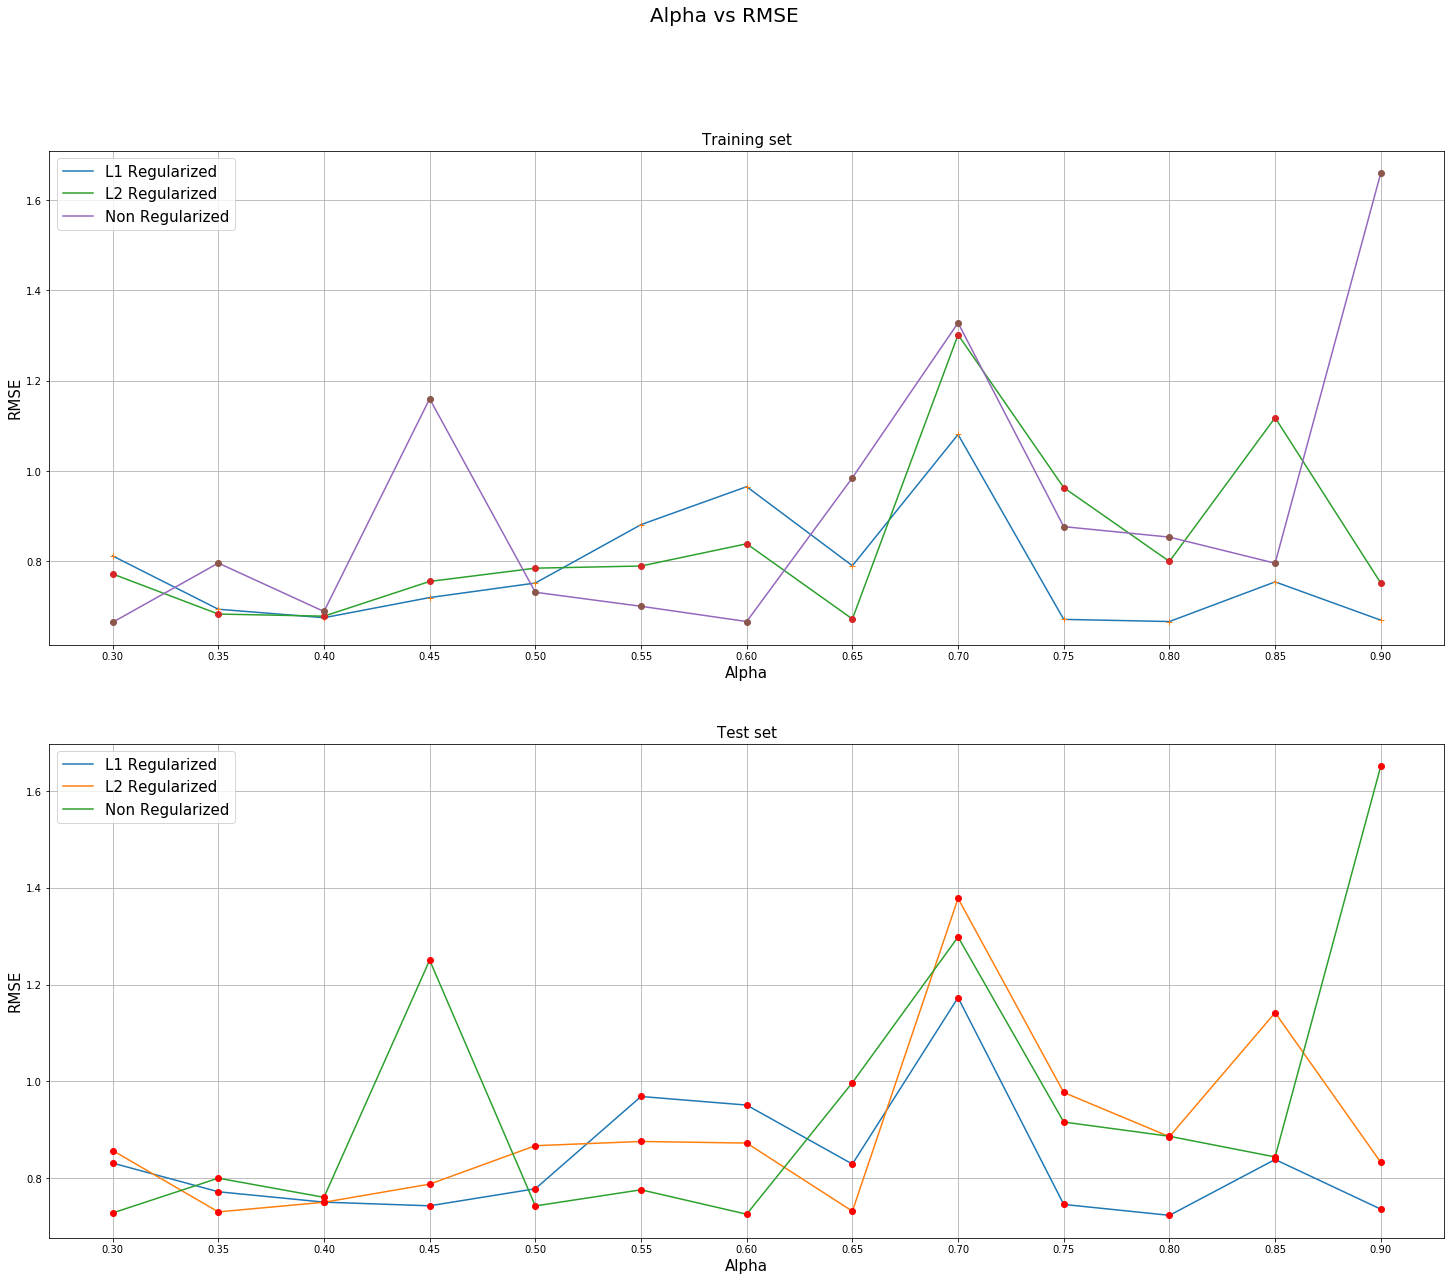

In [56]:
#Measure Train and Test RMSE and plot it on one plot.
fig, axs = plt.subplots(2, 1, figsize=(25, 20))
fig.suptitle("Alpha vs RMSE", fontsize = 20)
axs[0].plot(alphas, trainRMSEReg_lasso, label = "L1 Regularized")
axs[0].plot(alphas, trainRMSEReg_lasso, "o")
axs[0].plot(alphas, trainRMSEReg_ridge, label = "L2 Regularized")
axs[0].plot(alphas, trainRMSEReg_ridge, "o")
axs[0].plot(alphas, trainRMSENoReg, label = "Non Regularized")
axs[0].plot(alphas, trainRMSENoReg, "o")
axs[0].grid()
axs[0].set_xticks(alphas)
axs[0].set_xlabel('Alpha', fontsize = 15)
axs[0].set_ylabel('RMSE', fontsize = 15)
axs[0].set_title("Training set", fontsize = 15)
axs[0].legend(prop={'size': 15})
axs[1].plot(alphas, testRMSEReg_lasso, label = "L1 Regularized")
axs[1].plot(alphas, testRMSEReg_lasso, "ro")
axs[1].plot(alphas, testRMSEReg_ridge, label = "L2 Regularized")
axs[1].plot(alphas, testRMSEReg_ridge, "ro")
axs[1].plot(alphas, testRMSENoReg, label = "Non Regularized")
axs[1].plot(alphas, testRMSENoReg, "ro")
axs[1].grid()
axs[1].set_xticks(alphas)
axs[1].set_xlabel('Alpha', fontsize = 15)
axs[1].set_ylabel('RMSE', fontsize = 15)
axs[1].set_title("Test set", fontsize = 15)
axs[1].legend(prop={'size': 15})
plt.show()

In [45]:
#Tune the hyperparameters using scikit learn GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#clf = SGDRegressor(alpha=0.001, n_iter = 1000,learning_rate = 'constant' , penalty='l1' ,eta0= np.arange(0.1, 0.9, 0.05))

Best model for given parameter grid 
{'n_iter': 1000, 'penalty': None, 'eta0': 0.1, 'learning_rate': 'constant'}



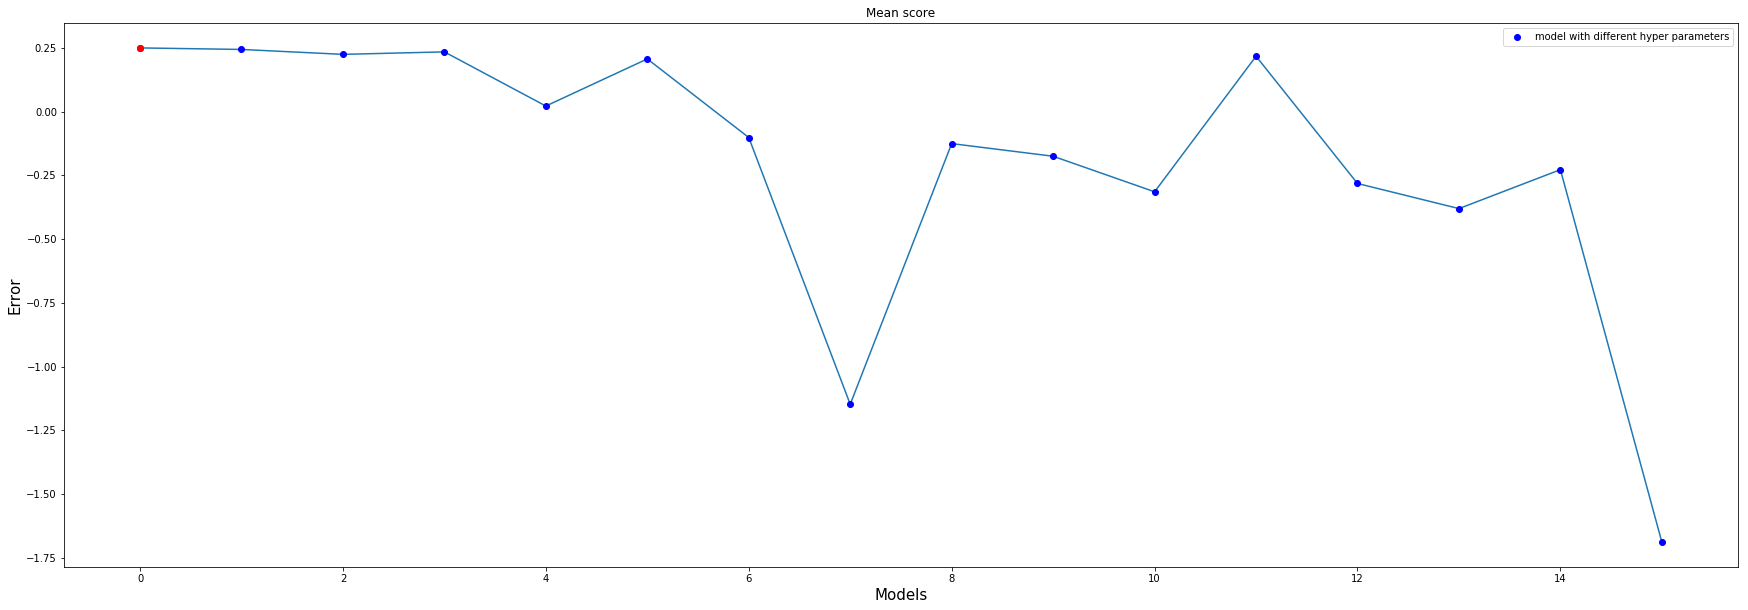

Best score 0.24942772135824653


In [46]:
gridNonRegularized = GridSearchCV(SGDRegressor(), cv = 3, n_jobs = 3, param_grid = {"n_iter" :[1000], "learning_rate" : ["constant"],"eta0" :  np.arange(0.1, 0.9, 0.05),
        "penalty" : [None]}, refit = True)
gridNonRegularized.fit(x_Train1, y_Train1)
print("Best model for given parameter grid \n" + str(gridNonRegularized.best_params_) + "\n")

plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(gridNonRegularized.cv_results_["mean_test_score"])
plt.plot(gridNonRegularized.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.plot(gridNonRegularized.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

print("Best score " + str(gridNonRegularized.best_score_))

Best model for given parameter grid 
{'n_iter': 1000, 'penalty': 'l1', 'alpha': 0.25000000000000006, 'eta0': 0.15000000000000002, 'learning_rate': 'constant'}



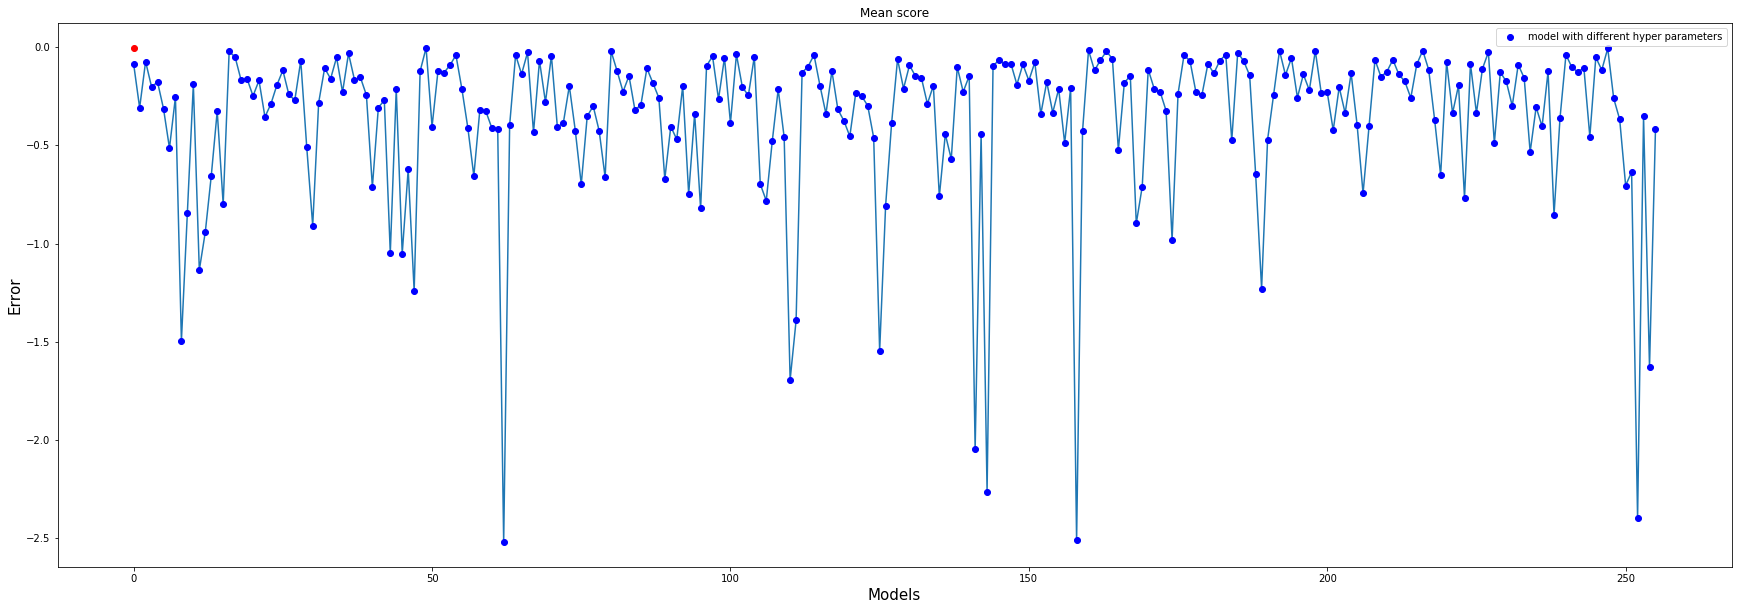

Best score -0.0028448951289899624


In [47]:
gridL1 = GridSearchCV(SGDRegressor(), cv = 3, n_jobs = 3, param_grid = {"n_iter" :[1000], "learning_rate" : ["constant"],
        "penalty" : ["l1"],"alpha" : np.arange(0.1, 0.9, 0.05),"eta0" :  np.arange(0.1, 0.9, 0.05)}, refit = True)
gridL1.fit(x_Train1, y_Train1)
print("Best model for given parameter grid \n" + str(gridL1.best_params_) + "\n")

plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(gridL1.cv_results_["mean_test_score"])
plt.plot(gridL1.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.plot(gridL1.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

print("Best score " + str(gridL1.best_score_))

Best model for given parameter grid 
{'n_iter': 1000, 'penalty': 'l1', 'alpha': 0.25000000000000006, 'eta0': 0.15000000000000002, 'learning_rate': 'constant'}



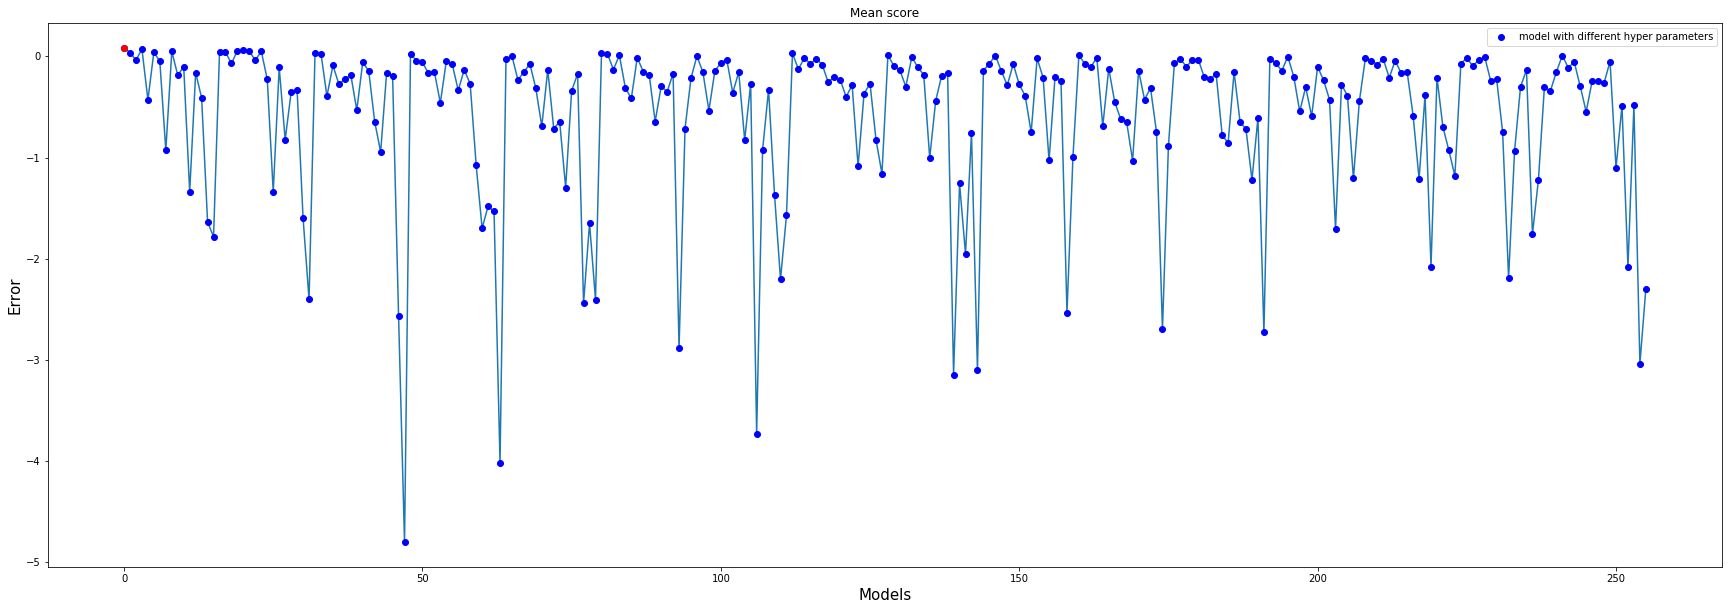

Best score 0.08485263058673169


In [48]:
gridL2 = GridSearchCV(SGDRegressor(), cv = 3, n_jobs = 3, param_grid = {"n_iter" :[1000], "learning_rate" : ["constant"],"penalty" : ["l2"],"alpha" : np.arange(0.1, 0.9, 0.05),"eta0" :  np.arange(0.1, 0.9, 0.05)}, refit = True)
gridL2.fit(x_Train1, y_Train1)
print("Best model for given parameter grid \n" + str(gridL1.best_params_) + "\n")

plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(gridL2.cv_results_["mean_test_score"])
plt.plot(gridL2.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.plot(gridL2.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

print("Best score " + str(gridL2.best_score_))

In [49]:
gridNonRegularized.best_estimator_

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1000, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

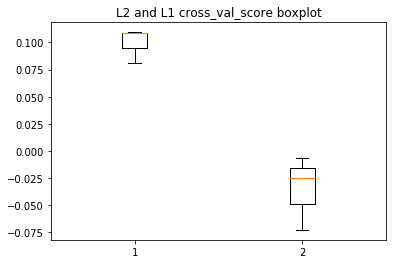

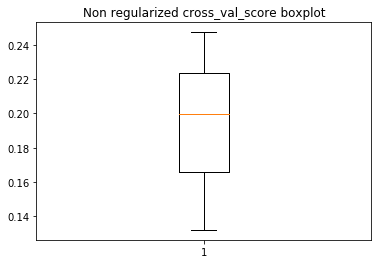

In [50]:
#Evaluate each model using cross_val_score
from sklearn.model_selection import cross_val_score
scoreNonReg = cross_val_score(gridNonRegularized.best_estimator_, x_Train1, y_Train1)
scoreL1 = cross_val_score(gridL1.best_estimator_, x_Train1, y_Train1)
scoreL2 = cross_val_score(gridL2.best_estimator_, x_Train1, y_Train1)
plt.boxplot([scoreL2, scoreL1])
plt.title("L2 and L1 cross_val_score boxplot")
plt.show()
plt.boxplot([scoreNonReg])
plt.title("Non regularized cross_val_score boxplot")
plt.show()

In [52]:
#Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [51]:
#D1 Dataset
x = np.random.uniform(0.9133, 1.0866, size = (100, 1))
x = sorted(x)
exps = np.vectorize(lambda x: (1.3 * (x * x)) + (4.8 * x) + 8)
y = exps(x)
err = np.random.rand(100, 1)
y = y + err

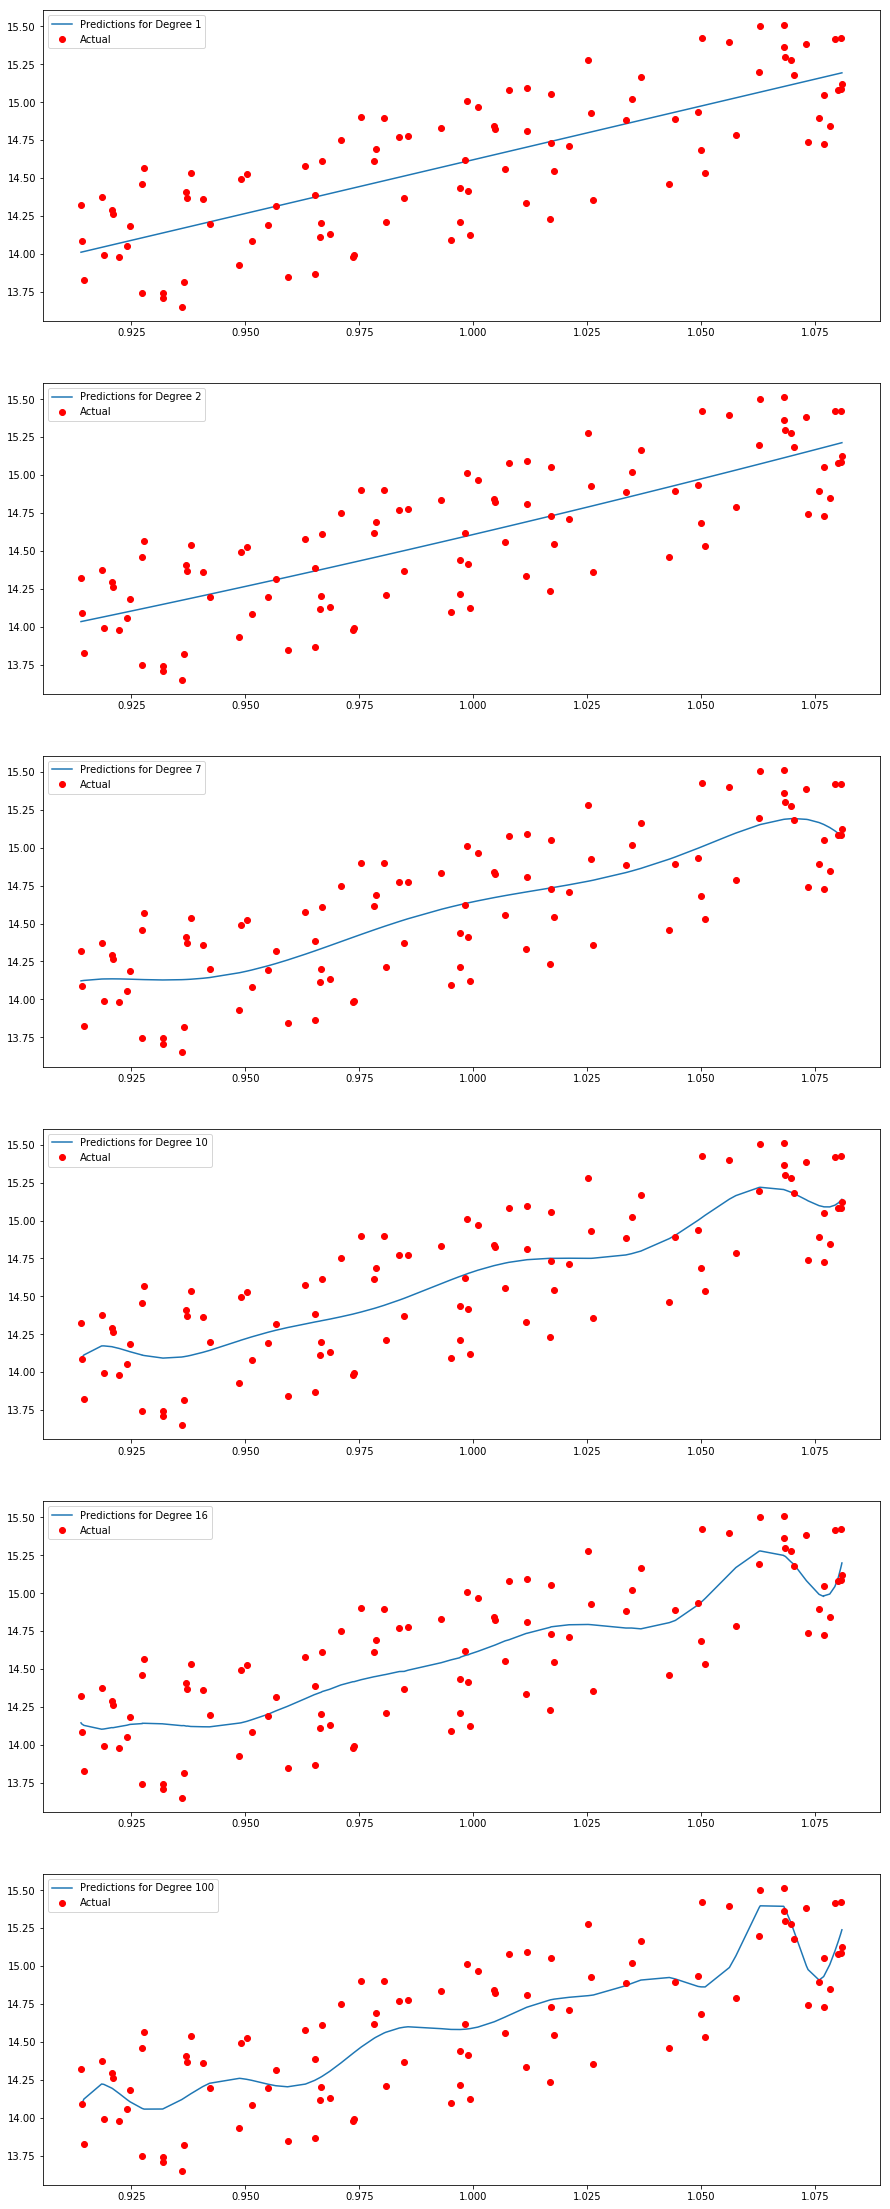

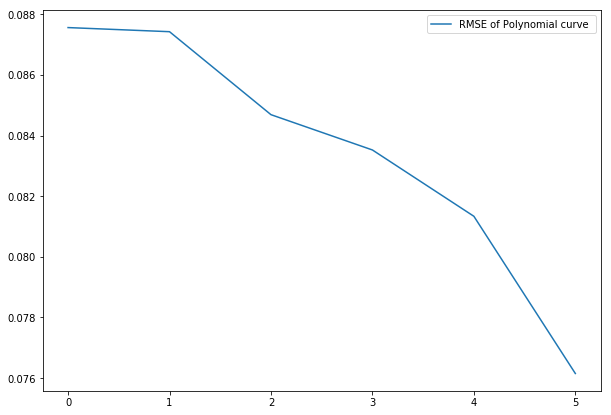

[0.08756300014317643, 0.0874271069349412, 0.08469016931708648, 0.08352557879221001, 0.08133830089446853, 0.07615249392130563]


In [53]:
#Prediction with high degree of polynomials
degrees = [1, 2, 7, 10, 16, 100]
fig2, axs2 = plt.subplots(6, 1, figsize=(15, 40))
index = 0
mseNoReg = []
for deg in degrees:
    model = make_pipeline(PolynomialFeatures(degree=deg, include_bias= False),
                      LinearRegression())
    model.fit(x, y)
    yPrediction = model.predict(x)    
    axs2[index].plot(x, yPrediction, label = "Predictions for Degree "+str(deg))
    axs2[index].plot(x, y, "ro", label = "Actual")
    axs2[index].legend()
    index = index + 1
    mseNoReg.append(mean_squared_error(y, yPrediction))
fig3, axs3 = plt.subplots(1, 1, figsize=(10, 7))
axs3.plot(mseNoReg, label = "RMSE of Polynomial curve ")
axs3.legend()
plt.show()
plt.close()
print(mseNoReg)

In [54]:
from sklearn.linear_model import Ridge

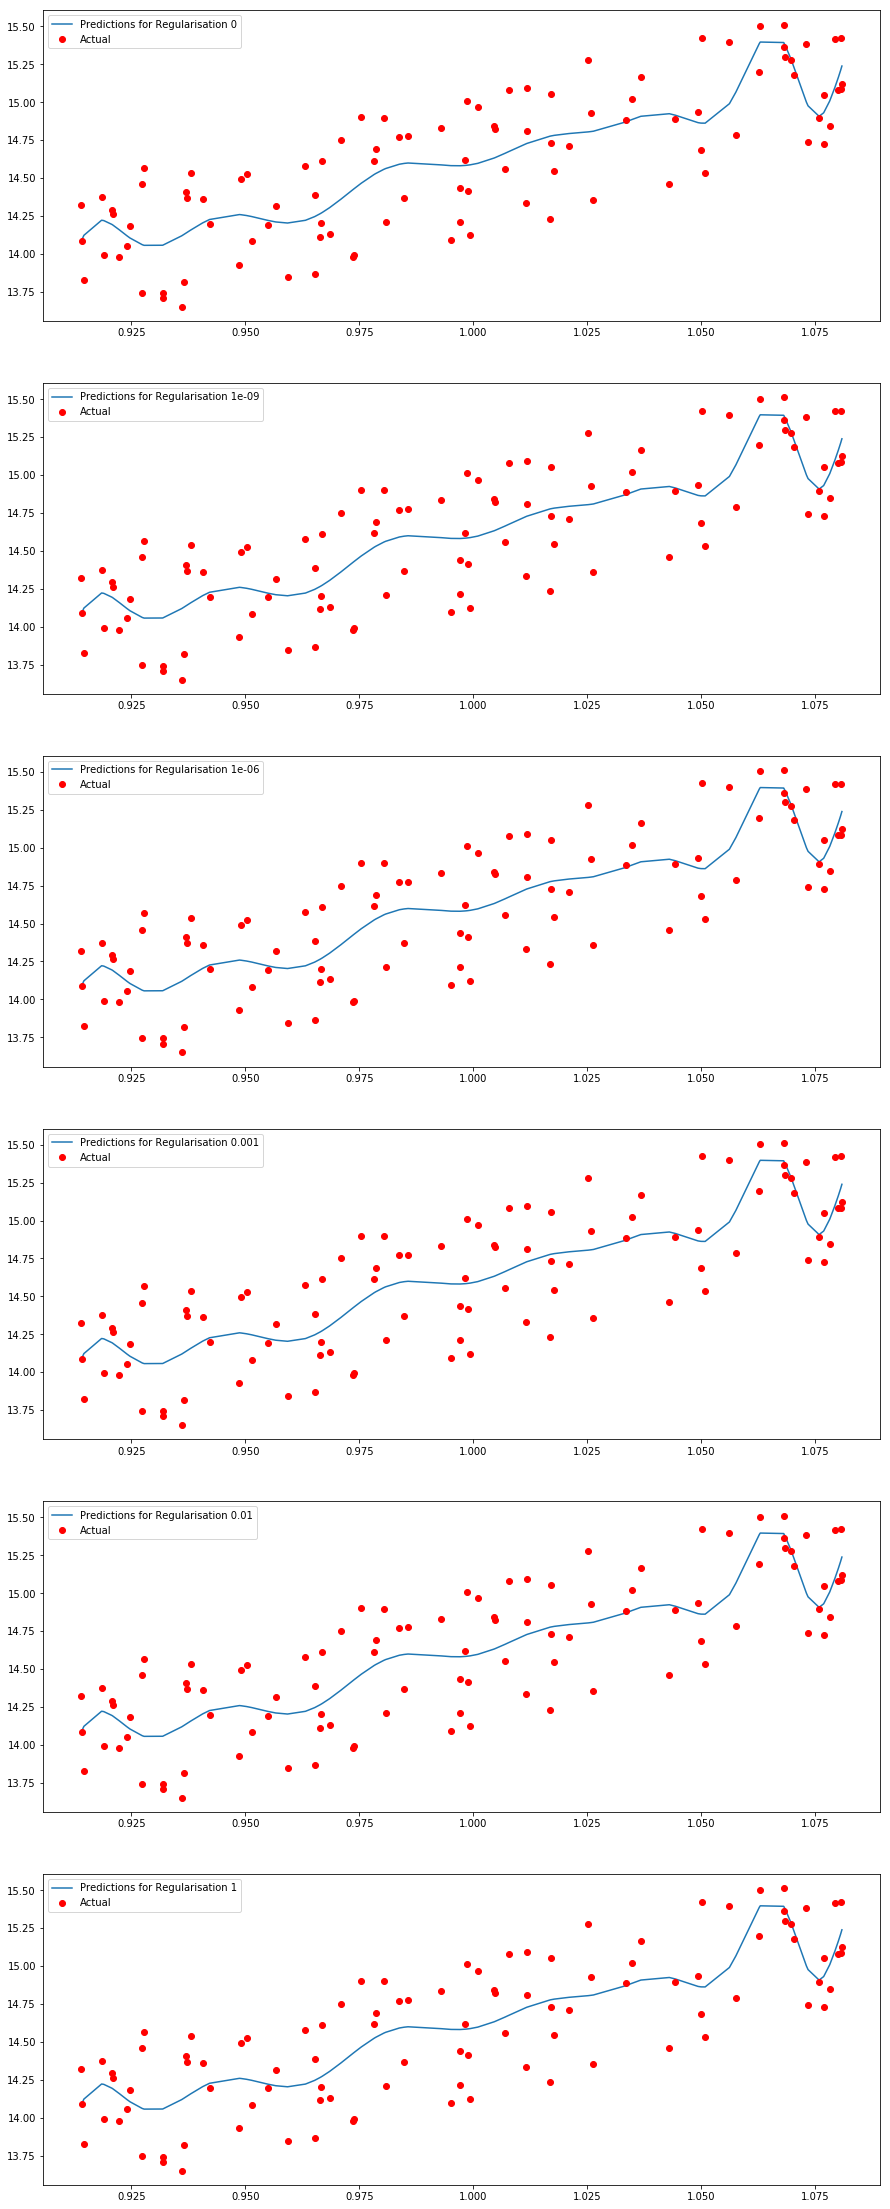

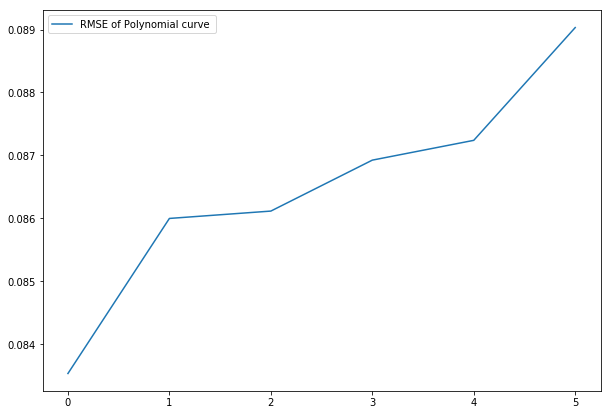

[0.08353734735018122, 0.08599980749590197, 0.08611656199225702, 0.08692566827144185, 0.08723997231773051, 0.08903070200914869]


In [55]:
#Effect of Regularization
degree = 10
regParameters = [0, 1e-9, 1e-6, 1e-3, 1e-2, 1]
fig2, axs2 = plt.subplots(6, 1, figsize=(15, 40))
index = 0
mseReg = []
for lam in regParameters:
    model = make_pipeline(PolynomialFeatures(degree=10, include_bias= False),
                      Ridge(alpha = lam))
    model.fit(x, y)
    yPrediction1 = model.predict(x)    
    axs2[index].plot(x, yPrediction, label = "Predictions for Regularisation "+str(lam))
    axs2[index].plot(x, y, "ro", label = "Actual")
    axs2[index].legend()
    index = index + 1
    mseReg.append(mean_squared_error(y, yPrediction1))
fig3, axs3 = plt.subplots(1, 1, figsize=(10, 7))
axs3.plot(mseReg, label = "RMSE of Polynomial curve ")
axs3.legend()
plt.show()
plt.close()
print(mseReg)